## Importing Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

##  Loading eBay stock price dataset
##  and Preparation of training set

In [2]:
dataset_train = pd.read_csv('ebay_stockprice_train.csv')
training_set = dataset_train.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

for i in range(50, 1000):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])

## Getting the training data in shape

In [3]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Creating the model for ebay stock price prediction

In [4]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

## Training the Model

In [13]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 30)

Epoch 1/200
32/32 [==============================] - 5s 54ms/step - loss: 0.0029
Epoch 2/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0029
Epoch 3/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0031
Epoch 4/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0025
Epoch 5/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0027
Epoch 6/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0025
Epoch 7/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0026
Epoch 8/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0025
Epoch 9/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0024
Epoch 10/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0025
Epoch 11/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0028
Epoch 12/200
32/32 [==============================] - 2s 59ms/step - loss: 0.0025
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 57ms/step - loss: 0.0026
Epoch 102/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0025
Epoch 103/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0023
Epoch 104/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0020
Epoch 105/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0022
Epoch 106/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0025
Epoch 107/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0023
Epoch 108/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0025
Epoch 109/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0022
Epoch 110/200
32/32 [==============================] - 2s 58ms/step - loss: 0.0022
Epoch 111/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0023
Epoch 112/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0021
Epoch 113/200
32/3

32/32 [==============================] - 2s 60ms/step - loss: 0.0021
Epoch 200/200
32/32 [==============================] - 2s 60ms/step - loss: 0.0023


## Loading the test dataset

In [14]:
ebay_test_dataset = pd.read_csv('ebay_stockprice_test.csv')
original_stock_price = ebay_test_dataset.iloc[:, 1:2].values

## Genereating the predicted stock price on test dataset

In [15]:
dataset_total = pd.concat((dataset_train['Open'], ebay_test_dataset['Open']), axis = 0)
input_data = dataset_total[len(dataset_total) - len(ebay_test_dataset) - 60:].values
input_data = input_data.reshape(-1,1)
input_data = sc.transform(input_data)
X_test = []
for i in range(50, 80):
    X_test.append(input_data[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 39ms/step


## Generating the plot for predicted data and original data

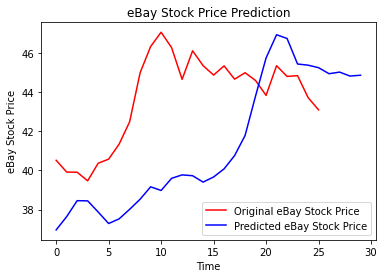

In [16]:
plt.plot(original_stock_price, color = 'red', label = 'Original eBay Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted eBay Stock Price')
plt.title('eBay Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('eBay Stock Price')
plt.legend()
plt.show()